In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# wczytanie danych
posts = pd.read_xml("apple/Posts.xml", parser = 'etree', )
comments = pd.read_xml("apple/Comments.xml", parser = 'etree', )
votes = pd.read_xml("apple/Votes.xml", parser = 'etree', )
tags = pd.read_xml("apple/Tags.xml", parser = 'etree', )

In [48]:
# przygotowanie danych
posts["CreationDate"] = pd.to_datetime(posts['CreationDate'],format='%Y-%m-%d')
posts["CreationMonth"] = posts["CreationDate"].dt.strftime('%Y-%m')
posts["CreationDate"] = posts["CreationDate"].dt.date

([<matplotlib.axis.XTick at 0x1f0f6b301f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

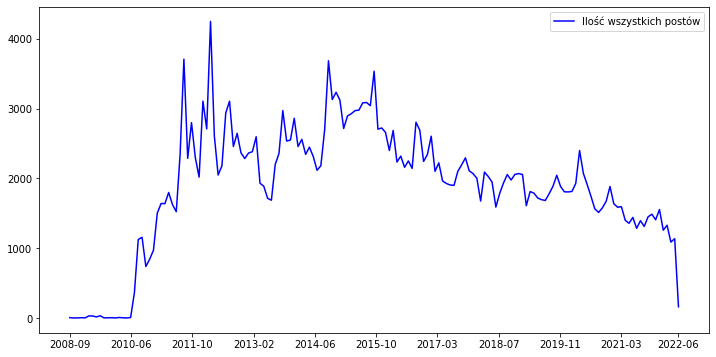

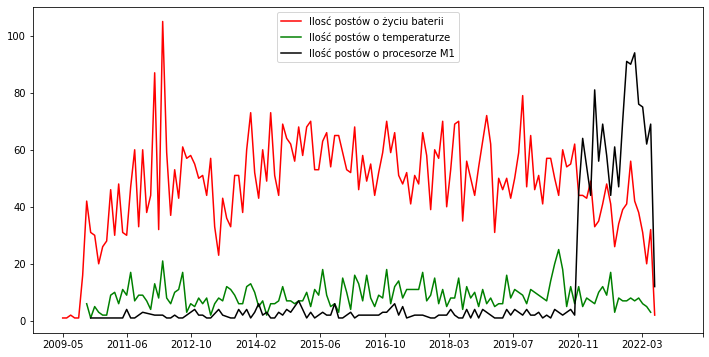

In [49]:
# ilość postów dotyczących baterii, temperatury oraz popularność procesorów M1 w postach i komentarzach

posts["IsAboutBattery"] = posts.Body.str.contains('battery') | posts.Tags.str.contains('battery') 
posts["IsAboutTemperature"] = posts.Body.str.contains('temperature') | posts.Tags.str.contains('temperature') 
posts["IsAboutM1"] = posts.Body.str.contains('M1') | posts.Tags.str.contains('M1') 

postsOverall = posts.groupby(["CreationMonth"]).size().reset_index(name='Count')

postsAboutBattery = posts[posts["IsAboutBattery"] == True]
postsAboutBattery = postsAboutBattery.groupby(["CreationMonth"]).size().reset_index(name='Count')
postsAboutTemperature = posts[posts["IsAboutTemperature"] == True]
postsAboutTemperature = postsAboutTemperature.groupby(["CreationMonth"]).size().reset_index(name='Count')
postsAboutM1 = posts[posts["IsAboutM1"] == True]
postsAboutM1 = postsAboutM1.groupby(["CreationMonth"]).size().reset_index(name='Count')

#magic number 0- ammount of months, for some reason len doesnt work
n = 161

labelLocations=[]
for i in range(10):
    labelLocations.append(n*i/10)
labelLocations.append(n-1)

fig = plt.subplots(figsize=(12, 6))

plt.plot(postsOverall["CreationMonth"],postsOverall["Count"], color='blue')
plt.xticks(labelLocations)
plt.legend(['Ilość wszystkich postów'])


fig = plt.subplots(figsize=(12, 6))
plt.plot(postsAboutBattery["CreationMonth"],postsAboutBattery["Count"], color='red')
plt.plot(postsAboutTemperature["CreationMonth"],postsAboutTemperature["Count"], color='green')
plt.plot(postsAboutM1["CreationMonth"],postsAboutM1["Count"], color='black')
plt.legend(['Ilosć postów o życiu baterii', 'Ilość postów o temperaturze', 'Ilość postów o procesorze M1'])

plt.xticks(labelLocations)


Porównanie aktywności użytkowników różnych społeczności

In [50]:
def calculate_activity_time(row):
    return  row["LastActivityDate"] - row["CreationDate"]

def calculate_community_data(posts_local, tags_local):
    posts_local["CreationDate"] = pd.to_datetime(posts_local['CreationDate'],format='%Y-%m-%d')
    posts_local["LastActivityDate"] = pd.to_datetime(posts_local['LastActivityDate'],format='%Y-%m-%d')
    post_count = len(posts_local)
    accepted_answer_post_count = len(posts_local[pd.isnull(posts_local["AcceptedAnswerId"])== True ] )
    abandoned_posts = len(posts_local[posts_local['AnswerCount'] == 0])
    more_than_5_answers = len(posts_local[posts_local['AnswerCount'] >5])
    average_comments = posts_local['AnswerCount'].mean()
    posts_local["ActivityTime"]= posts_local.apply (lambda row: calculate_activity_time(row), axis=1)
    average_activity_time = posts_local["ActivityTime"].mean()

    return {"post_count":post_count,
     "accepted_answer_percent":accepted_answer_post_count/post_count,
      "abandoned_posts_percent":abandoned_posts/post_count, 
      "average_commments":average_comments, 
      "average_activity_time":average_activity_time,
      "more_than_5_answers":more_than_5_answers/post_count,
        "top_10_tags": tags_local.nlargest(10, 'Count').sort_values(by = ['Count'],ascending=False)  }

In [55]:
#wczytaj android i windows phone
posts_android = pd.read_xml("android/Posts.xml", parser = 'etree', )
tags_android = pd.read_xml("android/Tags.xml", parser = 'etree', )

posts_android["CreationDate"] = pd.to_datetime(posts_android['CreationDate'],format='%Y-%m-%d')
posts_android["CreationMonth"] = posts_android["CreationDate"].dt.strftime('%Y-%m')
posts_android["CreationDate"] = posts_android["CreationDate"].dt.date

posts_windowsphone = pd.read_xml("windowsphone/Posts.xml", parser = 'etree', )
tags_windowsphone = pd.read_xml("windowsphone/Tags.xml", parser = 'etree', )

posts_windowsphone["CreationDate"] = pd.to_datetime(posts_windowsphone['CreationDate'],format='%Y-%m-%d')
posts_windowsphone["CreationMonth"] = posts_windowsphone["CreationDate"].dt.strftime('%Y-%m')
posts_windowsphone["CreationDate"] = posts_windowsphone["CreationDate"].dt.date


In [56]:
# porównanie aktywności użytkowników w różnych portalach

# apple
apple_data = calculate_community_data(posts, tags)

# android
android_data = calculate_community_data(posts_android, tags_android)

# windows phone
windowsphone_data = calculate_community_data(posts_windowsphone, tags_windowsphone)

print(apple_data)
print(android_data)
print(windowsphone_data)

{'post_count': 303393, 'accepted_answer_percent': 0.8482100773584097, 'abandoned_posts_percent': 0.0671109748741731, 'average_commments': 1.490890144153234, 'average_activity_time': Timedelta('179 days 03:20:11.919477752'), 'more_than_5_answers': 0.009070743227431087, 'top_10_tags':        Id      TagName  Count  ExcerptPostId  WikiPostId
897  3212        macos  39788       257978.0    257977.0
9      18       iphone  14221         7810.0      7809.0
104   181  macbook-pro  13147        18344.0     18343.0
81    137          ios  11635         8677.0      8676.0
26     43     terminal   5956         8988.0      8987.0
1       5          mac   5141         2412.0      2411.0
23     36     keyboard   5121        24324.0     24323.0
14     24         ipad   4875         8969.0      8968.0
24     37       itunes   4801         8982.0      8981.0
439  1195       icloud   4216        28923.0     28922.0}
{'post_count': 125658, 'accepted_answer_percent': 0.8711661812220471, 'abandoned_posts_p